<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Task/Task_0730_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0730. 교차 검증을 위한 사용자 함수를 생성한 후 아래 회귀트리 모델들에 대한 교차검증을 수행하세요.
- dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
- rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
- gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
- xgb_reg = XGBRegressor(n_estimators=1000)
- lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# 보스턴 데이터셋 불러오기
boston = fetch_openml(name="Boston", version=1, parser='auto')

# 데이터셋을 데이터프레임으로 변환
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

# 필요한 feature이면 dtype 변환
for col in boston_df.columns:
    if boston_df[col].dtype.name == 'category':
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)

# 특성과 타겟 변수 설정
X_data = boston_df.drop(['PRICE'], axis=1)
y_target = boston_df['PRICE']

In [2]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.883 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.403 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.278 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.980 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.531 


<Axes: xlabel='None', ylabel='None'>

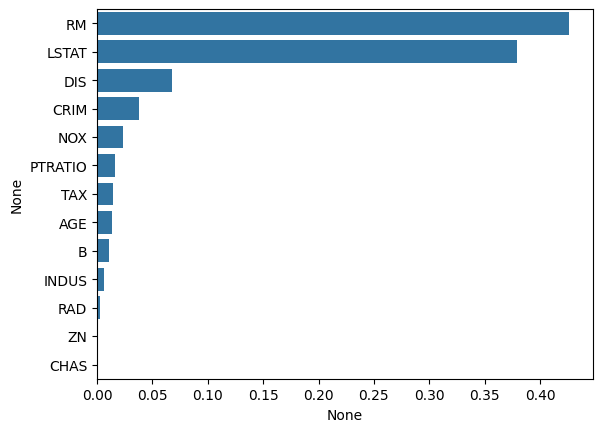

In [10]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 저용하여 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

<Axes: xlabel='None', ylabel='None'>

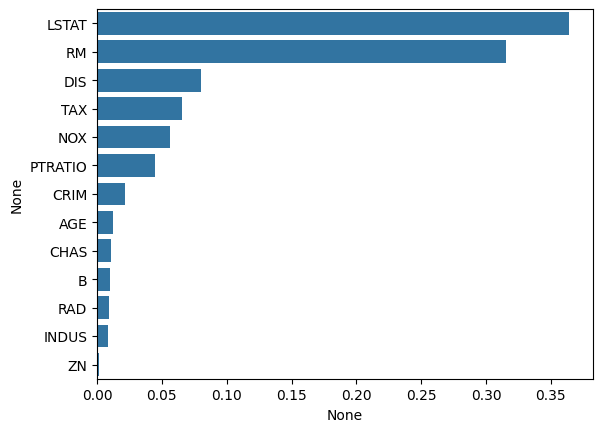

In [12]:
import seaborn as sns

xgb = XGBRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
xgb.fit(X_data, y_target)

feature_series = pd.Series(data=xgb.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [13]:
# sample()은 pandans의 DF 또는 SR의 축에서 항목을 무작위로 샘플링하는데 사용
boston_df.sample(n=3,random_state=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6


(100, 2)


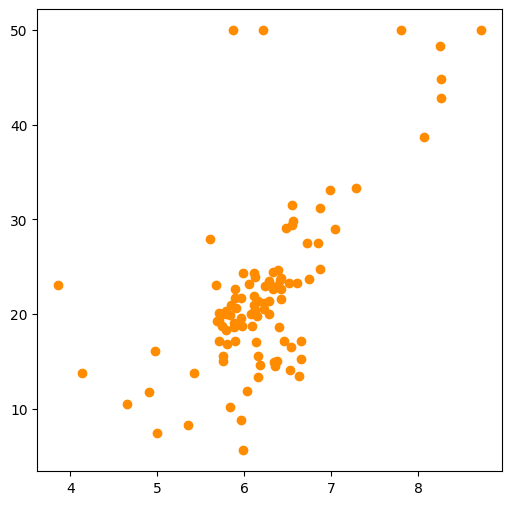

In [19]:
import matplotlib.pyplot as plt

bostonDF_sample = boston_df[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure(figsize=(6,6))
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

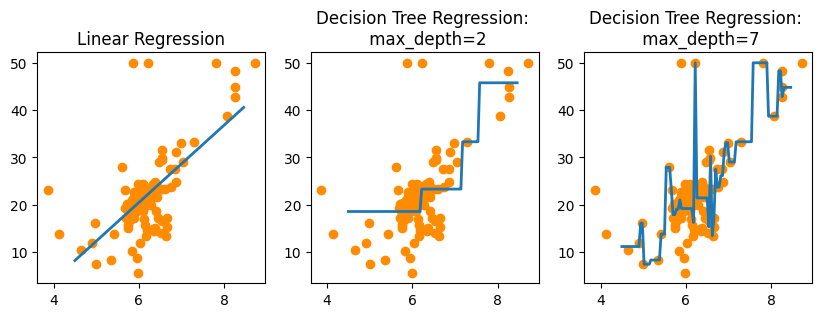

In [21]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(10,3), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

Q. 주어진 data에 대하여 회귀 모델을 사용하여 에너지 사용량을 예측하는 모델을 Xgbregressor, Lightgbmregressor 모델을 이용하여 모델링 및 평가 (MAE, MSE, RMSE)를 수행하세요.

XGBRegressor는 회귀 문제에 특화된 모델로, 여러 하이퍼파라미터를 통해 성능을 최적화할 수 있다.

주요 하이퍼파라미터:

n_estimators: 부스팅을 위해 생성될 결정 트리의 개수입니다. 일반적으로 더 많은 트리가 모델의 성능을 향상시킬 수 있지만, 너무 많으면 과적합(overfitting)을 일으킬 수 있습니다.

learning_rate (eta): 각 부스팅 단계에서의 스텝 사이즈로, 새로운 트리의 기여도를 조절합니다. 낮은 값은 학습을 더 안정적으로 만들지만, 너무 낮으면 많은 트리가 필요하게 되고, 이는 과적합을 초래할 수 있습니다.

max_depth: 각 트리의 최대 깊이를 제한합니다. 깊은 트리는 더 복잡한 패턴을 학습할 수 있지만, 과적합의 위험이 있습니다.

min_child_weight: 자식 노드를 분할하기 위한 인스턴스 가중치(합)의 최소값입니다. 이 값을 크게 설정하면 더 보수적인 모델이 생성됩니다.

gamma (min_split_loss): 리프 노드를 추가로 분할하기 위한 최소 손실 감소 값입니다. 큰 값은 모델이 더 보수적이 되도록 합니다.

subsample: 각 트리를 훈련할 때 사용할 데이터 샘플의 비율입니다. 이는 과적합을 방지하는 데 도움이 됩니다.

colsample_bytree/colsample_bylevel/colsample_bynode: 트리, 레벨, 노드를 기준으로 각각 훈련에 사용할 특성(열)의 비율입니다. 이를 통해 과적합을 줄일 수 있습니다.

lambda (reg_lambda): L2 정규화 항의 가중치입니다. 이는 모델의 복잡도를 제한하여 과적합을 방지하는 데 도움이 됩니다.

alpha (reg_alpha): L1 정규화 항의 가중치입니다. 불필요한 특성의 가중치를 0으로 만들어 모델을 더 단순하게 만듭니다.

scale_pos_weight: 불균형 데이터셋을 다룰 때 양성 클래스의 가중치를 조절합니다. 주로 분류 문제에서 사용됩니다.

objective: 최적화할 손실 함수를 지정합니다. 회귀 문제에서는 reg:squarederror, reg:linear, reg:gamma 등이 사용될 수 있습니다.

random_state: 결과의 재현 가능성을 위한 난수 시드입니다.

 LightGBM의 여러 하이퍼파라미터를 통해 성능을 조정할 수 있다.

 주요 하이퍼파라미터:

 n_estimators: 부스팅을 위해 생성될 결정 트리의 개수입니다. 더 많은 트리는 일반적으로 모델의 성능을 향상시킬 수 있으나, 너무 많으면 과적합을 일으킬 수 있습니다.

learning_rate: 각 부스팅 단계에서의 업데이트 크기를 조절합니다. 낮은 학습률은 학습 과정을 더 안정적으로 만들 수 있지만, 충분한 성능을 달성하기 위해 더 많은 트리가 필요할 수 있습니다.

max_depth: 트리의 최대 깊이를 제한합니다. 깊은 트리는 더 복잡한 패턴을 학습할 수 있지만, 과적합의 위험을 증가시킵니다.

num_leaves: 하나의 트리가 가질 수 있는 최대 리프의 수입니다. LightGBM에서는 이 값을 통해 트리의 복잡성을 조절합니다. num_leaves의 값이 크면 모델의 복잡도가 증가하므로, 과적합에 주의해야 합니다.

min_child_samples (min_data_in_leaf): 리프 노드가 가지고 있어야 할 최소 데이터 수입니다. 과적합을 방지하기 위해 사용됩니다.

min_child_weight: 자식 분할을 가지기 위한 인스턴스 가중치 합의 최소값입니다. 더 큰 값은 모델을 더 보수적으로 만듭니다.

subsample (bagging_fraction): 트리를 구축할 때 사용할 데이터 샘플의 비율입니다. 이는 과적합을 방지하는 데 도움이 됩니다.

colsample_bytree (feature_fraction): 트리를 구축할 때 사용할 특성(열)의 비율입니다. 이를 통해 과적합을 방지하고 학습 속도를 향상시킬 수 있습니다.

reg_alpha (lambda_l1): L1 정규화 항의 가중치입니다. 이는 모델의 복잡도를 줄이는 데 도움이 됩니다.

reg_lambda (lambda_l2): L2 정규화 항의 가중치입니다. 이는 또한 모델의 복잡도를 줄이고 과적합을 방지하는 데 도움이 됩니다.

max_bin: 수치형 변수를 이산화(discretization)할 때 사용되는 최대 bin의 수입니다. 이 값이 크면 모델의 정확도는 향상될 수 있지만, 과적합의 위험과 메모리 사용량이 증가합니다.

boosting_type: 부스팅 타입을 지정합니다. LightGBM은 gbdt (기본값), rf (랜덤포레스트), dart, goss 등 여러 부스팅 타입을 지원합니다.

objective: 최적화할 손실 함수를 지정합니다. 회귀 문제의 경우 regression, regression_l1, `huber

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 가상의 데이터 생성
np.random.seed(42)
data_size = 1000
data = {
    'area': np.random.uniform(1000, 3000, data_size),
    'type': np.random.randint(0, 2, data_size),
    'location': np.random.randint(0, 3, data_size),
    'energy_usage': np.random.uniform(200, 600, data_size)  # kWh
}
df = pd.DataFrame(data)
df.head()

,area,type,location,energy_usage
0,1749.080238,0,1,561.443138
1,2901.428613,1,1,293.105259
2,2463.987884,1,0,522.958412
3,2197.316968,1,0,223.637556
4,1312.037281,1,1,559.538955


In [23]:
X = df[['area', 'type', 'location']]
y = df['energy_usage']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 훈련
# objective 매개변수는 모델이 최소화하려는 손실함수나 최적화할 목표
# xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)

# LightGBM 모델 훈련
# lgbm_regressor = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_regressor = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_regressor.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xgb_regressor.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'XGBoost MAE: {mae_xgb:.2f}')
print(f'XGBoost MSE: {mse_xgb:.2f}')
print(f'XGBoost RMSE: {rmse_xgb:.2f}')

y_pred_lgbm = lgbm_regressor.predict(X_test)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

print(f'LightGBM MAE: {mae_lgbm:.2f}')
print(f'LightGBM MSE: {mse_lgbm:.2f}')
print(f'LightGBM RMSE: {rmse_lgbm:.2f}')

XGBoost MAE: 100.91
XGBoost MSE: 14651.81
XGBoost RMSE: 121.04
LightGBM MAE: 97.31
LightGBM MSE: 13658.11
LightGBM RMSE: 116.87


Task2_0730. iris 데이터셋에 대하여 랜덤포레스트로 학습 및 평가한 결과와 차원축소한 후 c1,c2를 적용하여 학습 평가한 결과를 비교하세요. (단 cross_val_score를 적용하여 평가)

In [ ]:
# 분류를 적용한 결과 비교
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores)
print('평균 정확도 : {:.2f}'.format(np.mean(scores)))

In [ ]:
# PCA 변환 데이터 세트 적용
pca_X = df_iris_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores_pca)
print('평균 정확도 : {:.2f}'.format(np.mean(scores_pca)))

차원 축소 전 평균 정확도: 0.9667


Task3_0730. 상관도가 높은 BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성에 대하여 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산하세요.

In [25]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/credit_card.xls', sheet_name='Data',header=1)
print(df.shape)

Mounted at /content/drive
(30000, 25)


In [26]:
# PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop(['default','ID'], axis=1)

In [27]:
# 상관도가 높은 속성을 PCA로 변환한 뒤 explained_variance_ratio_ 속성으로 확인
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 6개의 속성을 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
# 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명
print('PCA Component 별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성: [0.90555253 0.0509867 ]


In [28]:
# 원본 데이터 세트와 PCA 변환한 데이터 세트의 분류 예측 결과 비교

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=150)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

# 원본 데이터 세트의 분류 예측 결과

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8067 0.8214 0.8225]
평균 정확도:0.8169


Task4_0730. 신용카드 데이터셋 전체 23개 속성에 대하여 6개의 컴포넌트를 가진 PCA 변환을 수행하고 모델은 RF, cv=3, scoring='accuracy'을 적용하여 cross_val_score()로 분류 예측 수행하세요.

In [29]:
# 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측결과 보다
# 1~2% 정도의 예측 성능 저하만 발생
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
rcf = RandomForestClassifier(n_estimators=300, random_state=150)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대한 동일한 분류 예측

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7902 0.7964 0.8035]
PCA 변환 데이터 세트 평균 정확도:0.7967
